In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load Data

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
# drop unnecessary column
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
def unique_col_value(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}: {df[col].unique()}')

In [9]:
unique_col_value(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [10]:
# EDA

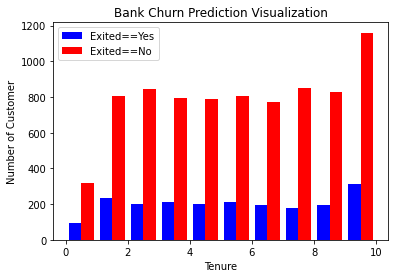

In [11]:
tenure_exited_yes = df[df['Exited'] == 1].Tenure
tenure_exited_no = df[df['Exited'] == 0].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customer")
plt.title("Bank Churn Prediction Visualization")

plt.hist([tenure_exited_yes,tenure_exited_no],color=['blue','red'],label=['Exited==Yes','Exited==No'])
plt.legend()

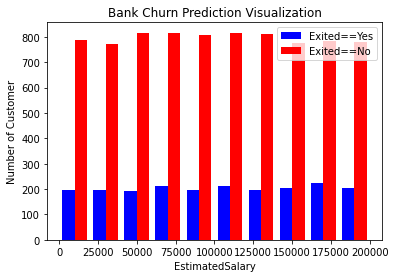

In [12]:
es_exited_yes = df[df['Exited'] == 1].EstimatedSalary
es_exited_no = df[df['Exited'] == 0].EstimatedSalary

plt.xlabel("EstimatedSalary")
plt.ylabel("Number of Customer")
plt.title("Bank Churn Prediction Visualization")

plt.hist([es_exited_yes,es_exited_no],color=['blue','red'],label=['Exited==Yes','Exited==No'])
plt.legend()

In [13]:
unique_col_value(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [14]:
# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# cols_to_encode = ['Geography','Gender']

# df[cols_to_encode] = df[cols_to_encode].apply(le.fit_transform)

df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [16]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
# One hot Encoding

In [18]:
df1 = pd.get_dummies(data=df,columns=['Geography'])

In [19]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [20]:
# Feature Scalling

In [21]:
cols_to_scale = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [23]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [ ]:
# Train - Test spilt

In [26]:
X = df1.drop('Exited',axis=1)
y = df1['Exited']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# Build a model (ANN) in tensorflow/keras

In [31]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [35]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [40]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 555us/step - loss: 0.3290 - accuracy: 0.8644
Epoch 2/100
250/250 [==============================] - 0s 535us/step - loss: 0.3280 - accuracy: 0.8635
Epoch 3/100
250/250 [==============================] - 0s 581us/step - loss: 0.3279 - accuracy: 0.8621
Epoch 4/100
250/250 [==============================] - 0s 577us/step - loss: 0.3280 - accuracy: 0.8640
Epoch 5/100
250/250 [==============================] - 0s 560us/step - loss: 0.3280 - accuracy: 0.8649
Epoch 6/100
250/250 [==============================] - 0s 519us/step - loss: 0.3290 - accuracy: 0.8639
Epoch 7/100
250/250 [==============================] - 0s 975us/step - loss: 0.3289 - accuracy: 0.8631
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8635
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8670
Epoch 10/100
250/250 [==============================] - 0s 475us/step - loss:

250/250 [==============================] - 0s 437us/step - loss: 0.3274 - accuracy: 0.8665
Epoch 81/100
250/250 [==============================] - 0s 438us/step - loss: 0.3268 - accuracy: 0.8654
Epoch 82/100
250/250 [==============================] - 0s 461us/step - loss: 0.3273 - accuracy: 0.8648
Epoch 83/100
250/250 [==============================] - 0s 446us/step - loss: 0.3280 - accuracy: 0.8636
Epoch 84/100
250/250 [==============================] - 0s 436us/step - loss: 0.3282 - accuracy: 0.8633
Epoch 85/100
250/250 [==============================] - 0s 439us/step - loss: 0.3274 - accuracy: 0.8640
Epoch 86/100
250/250 [==============================] - 0s 438us/step - loss: 0.3278 - accuracy: 0.8625
Epoch 87/100
250/250 [==============================] - 0s 443us/step - loss: 0.3273 - accuracy: 0.8641
Epoch 88/100
250/250 [==============================] - 0s 471us/step - loss: 0.3272 - accuracy: 0.8650
Epoch 89/100
250/250 [==============================] - 0s 443us/step - loss:

In [41]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 516us/step - loss: 0.3330 - accuracy: 0.8620


[0.33300358057022095, 0.8619999885559082]

In [42]:
pred = model.predict(X_test)

In [45]:
pred[:5]

array([[0.03239653],
       [0.02577609],
       [0.13348892],
       [0.01193619],
       [0.06324124]], dtype=float32)

In [47]:
y_pred = []

for element in pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [49]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.54      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.86      2000



Text(69.0, 0.5, 'Truth')

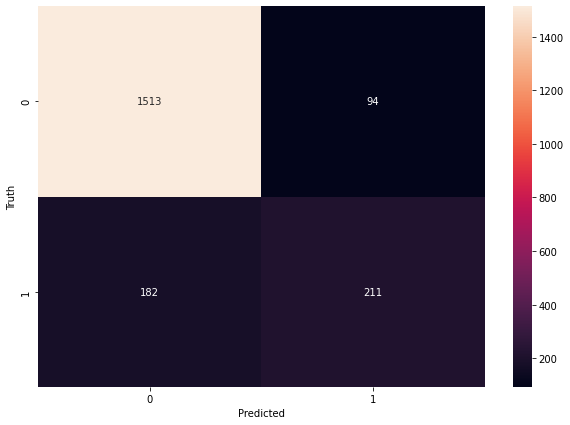

In [55]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
pd.DataFrame({'Actual' : y_test, 'Predict' : y_pred})

,Actual,Predict
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
6412,1,1
8285,0,0
7853,1,1
1095,1,0
